In [1]:

import glob
import os.path as path

import ndjson

dataset_path='/raid5/liuchang/quick_draw'
class_name = ['calendar', 'snowman', 'penguin', 'blackberry', 'teddy-bear']  # class_name=-1 means all class
country_code = -1  # country_code=-1 means all countries
output_path='/raid5/liuchang/quick_draw_output'


import numpy as np
def split_data(data):
    return [(i['recognized'],i['drawing'],i['word']) for i in data]

splitted=[]
i =0
min_len=np.inf
for file_path in glob.iglob(path.join(dataset_path,'*.ndjson')):
    i += 1
    label=file_path.split('/')[-1].split('.')[0]
    if class_name!=-1 and label not in class_name:
        continue
    print('readding data from {}'.format(file_path))
    with open(file_path) as f:
        data = ndjson.load(f)
    print('Now found {} avaliable data.'.format(len(data)))
    splitted.append(split_data(data))
    min_len=min(min_len,len(data))


import random
dataset=[]
for i,data in enumerate(splitted):
    dataset+=random.sample(data,min_len)

readding data from /raid5/liuchang/quick_draw/penguin.ndjson
Now found 253791 avaliable data.
readding data from /raid5/liuchang/quick_draw/teddy-bear.ndjson
Now found 179568 avaliable data.
readding data from /raid5/liuchang/quick_draw/calendar.ndjson
Now found 321981 avaliable data.
readding data from /raid5/liuchang/quick_draw/snowman.ndjson
Now found 340029 avaliable data.
readding data from /raid5/liuchang/quick_draw/blackberry.ndjson
Now found 128153 avaliable data.


In [4]:
def get_max_len_stroke(x):
    l_len=[]
    l_stroke=[]
    for i,item in enumerate(x):
        item=item[1]
        l_stroke.append(len(item))
        max_len=0
        for j,stroke in enumerate(item):
            max_len=max(max_len,len(stroke[0])) 
        l_len.append(max_len)
    return l_len,l_stroke
l_len,l_strock=get_max_len_stroke(dataset)

In [5]:
def count(l):
    x=list(range(0,max(l)))
    y=[l.count(i) for i in x]
    return x,y

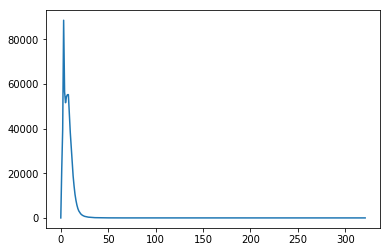

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
x,y=count(l_strock)
plt.figure()
plt.plot(x,y)
plt.show()

In [106]:
max_stroke_cut=30
to_cut=np.sum(y[max_stroke_cut:])

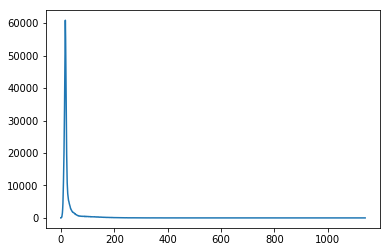

In [107]:
x,y=count(l_len)
plt.figure()
plt.plot(x,y)
plt.show()

In [108]:
max_len_cut=200
to_cut+=np.sum(y[max_len_cut:])


In [109]:
print("To cut",to_cut,"paintings")
print("It is about",to_cut/(len(dataset)))

To cut 32346 paintings
It is about 0.051079836524309745


In [87]:
#cut down dataset
def cut_large_paint(x,max_stroke_cut,max_len_cut):
    new_dataset=[]
    for i,item in enumerate(x):
        item=item[1]
        if len(item)>max_stroke_cut:
            continue
        max_len=0
        for j,stroke in enumerate(item):
            max_len=max(max_len,len(stroke[0])) 
        if max_len>max_len_cut:
            continue
        new_dataset.append(x[i])
    return new_dataset
new_dataset=cut_large_paint(dataset,max_stroke_cut,max_len_cut)

In [92]:
dataset=new_dataset

In [93]:
random.shuffle(dataset)
print(min_len,len(dataset))
Recognized=[i[0] for i in dataset]
X=[i[1] for i in dataset]
Y=[i[2] for i in dataset]

Yu = set(Y)
dict = {}
for index, label in enumerate(Yu):
    dict[label] = index

Yc = []
for i in Y:
    Yc.append(dict[i])

r=int(0.8*len(X))
train_Recognized=Recognized[:r]
train_X=X[:r]
train_Y=Yc[:r]
test_Recognized=Recognized[r:]
test_X=X[r:]
test_Y=Yc[r:]

128153 633244


In [94]:
import pickle
import os
with open(os.path.join(output_path,'1102_05b'+str(len(X))),'wb') as f:
    pickle.dump((train_Recognized,train_X,train_Y,test_Recognized,test_X,test_Y),f)

In [95]:
len(train_X)+len(test_X)

633244